<a id = '0.0'></a>
<p style = "font-size : 35px; color : black ; text-align : center; background-color : yellow; border-radius: 5px 5px;"><strong>Data Cleaning and Exploration</strong></p>  

<img src="https://emergeapp.net/wp-content/uploads/2017/01/Retail-Terms-every-Modern-Retailer-e1485766463692.jpg" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="margin-left: 18%; float: center;  border:2px solid ; width:60%; height : 80%;"/></a>


<font color="yellow" size=+2.5><b>Table of Contents</b></font>

<a href="#IL" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover"> <font color="lightseagreen" size=3><b>1- Importing Libraries</b></font></a>

<a href="#ID" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover"> <font color="lightseagreen" size=3><b>2- Importing Dataset</b></font></a>

<a href="#DE" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover"> <font color="lightseagreen" size=3><b>3- Basic Data Exploration(Understanding the Dataset)</b></font></a>

<a href="#DC" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover"> <font color="lightseagreen" size=3><b>4- Data Cleaning</b></font></a>

<a href="#EDA" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover"> <font color="lightseagreen" size=3><b>5- Feature Engineering</b></font></a>

<a href="#EDA" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover"> <font color="lightseagreen" size=3><b>6- Data Analysis</b></font></a>

<a id = 'IL'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black">1- Importing Libraries

In [222]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify as sq
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

<a id = 'ID'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black">2- Importing Dataset

In [224]:
data = pd.read_excel('Online Retail.xlsx')

<a id = 'DE'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black">3- Basic Data Exploration(Understanding the Dataset)

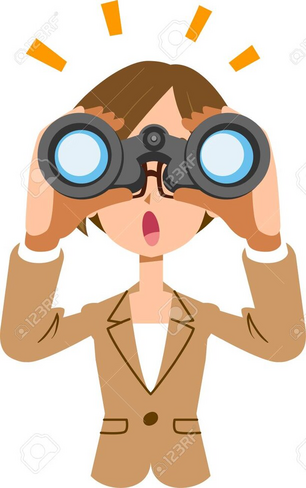

<font color="orange" size=3><b>We will check the below things:</b></font>

* `Head of the dataset`
* `The shape of the dataset`
* `Datatypes for every column`
* `Summary of the dataset`


In [228]:
data.head().style.background_gradient()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550000,17850.000000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390000,17850.000000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750000,17850.000000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390000,17850.000000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390000,17850.000000,United Kingdom


In [229]:
print(f"The Shape Of Data is : {data.shape[0]} Rows and {data.shape[1]} Columns" )

The Shape Of Data is : 541909 Rows and 8 Columns


In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [231]:
data.describe().style.background_gradient()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,nan,96.759853,1713.600303


<a id = 'DC'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black">4- Data Cleaning

<font color="orange" size=3><b>We will do the below things:</b></font>

* `Drop unrelated Columns`
* `Drop Null Values`
* `Drop Duplicate Values`
* `Cleaning Dirty Columns`
* `Dealing With Outliers`

<font color="white" size=3><b>1) Drop unrelated Columns</b></font>

In [235]:
data = data.drop(["CustomerID" , "StockCode"] , axis=1)

<font color="white" size=3><b>2) Drop Null Values</b></font>

In [237]:
null = pd.DataFrame({"Null Values" : data.isna().sum().sort_values(ascending = False) , 
                    "Percentage of Null Values" : (data.isna().sum().sort_values(ascending = False)) / (data.shape[0]) * (100)})
null.style.background_gradient()

,Null Values,Percentage of Null Values
Description,1454,0.268311
InvoiceNo,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


In [238]:
data = data.dropna()
null = pd.DataFrame({"Null Values" : data.isna().sum().sort_values(ascending = False) , 
                    "Percentage of Null Values" : (data.isna().sum().sort_values(ascending = False)) / (data.shape[0]) * (100)})
null.style.background_gradient()

,Null Values,Percentage of Null Values
InvoiceNo,0,0.000000
Description,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


<font color="white" size=3><b>3) Drop duplicated Values</b></font>

In [240]:
duplicated = data.duplicated()
print(f"Number of Duplicated Values is : {duplicated.sum()}")

Number of Duplicated Values is : 5338


In [241]:
data = data.drop_duplicates()
duplicated = data.duplicated()
print(f"Number of Duplicated Values is : {duplicated.sum()}")

Number of Duplicated Values is : 0


<font color="white" size=3><b>4) Cleaning Dirty Columns</b></font>

* InvoiceNo	

In [244]:
data["InvoiceNo"].value_counts()

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
C551348       1
C551386       1
C572187       1
C551388       1
C559309       1
Name: count, Length: 24446, dtype: int64

In [245]:
data["InvoiceNo"].str.contains("C").value_counts()

InvoiceNo
True     9250
False       3
Name: count, dtype: int64

In [246]:
data["InvoiceNo"] = data["InvoiceNo"].astype(str)
data = data[~data["InvoiceNo"].str.contains("C")]

* Description
  
  Removing postage in rows because makes no sense as it is the amount taken for sending the item, like shipment of the product

In [248]:
data["Description"] = data["Description"].str.strip()
postage = data["Description"] == "POSTAGE"
postage.value_counts()

Description
False    524741
True       1126
Name: count, dtype: int64

In [249]:
Postage = data[data["Description"] == "POSTAGE"]
data = data.drop(Postage.index)

In [250]:
data.shape

(524741, 6)

<font color="white" size=3><b>5) Dealing With Outliers</b></font>

* Quantity

<Axes: ylabel='Quantity'>

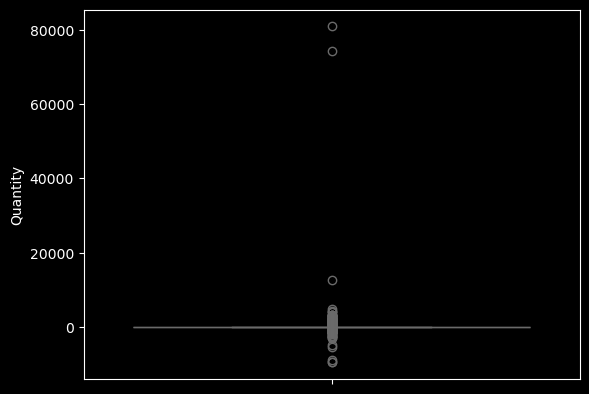

In [253]:
sns.boxplot(data['Quantity'])

In [254]:
data = data[(data['Quantity'] <= 200) & (data['Quantity'] >= 0)]
data['Quantity'].describe()

count    522482.000000
mean          8.848456
std          16.832980
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max         200.000000
Name: Quantity, dtype: float64

* UnitPrice

<Axes: ylabel='UnitPrice'>

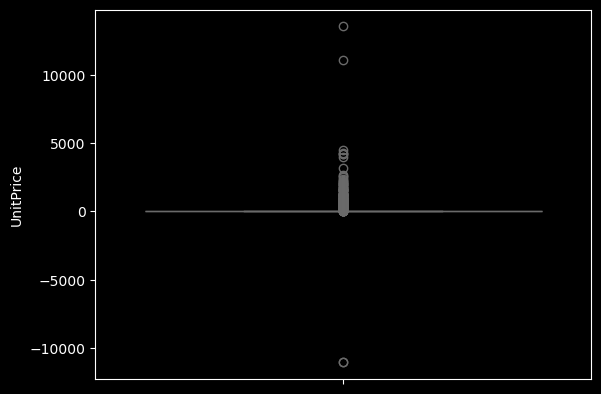

In [256]:
sns.boxplot(data['UnitPrice'])

In [257]:
data = data[(data['UnitPrice'] <= 3000) & (data['UnitPrice'] >= 0)]
data['UnitPrice'].describe()

count    522472.000000
mean          3.775371
std          20.114763
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max        2653.950000
Name: UnitPrice, dtype: float64

* Extract Countries that I care about

In [259]:
data["Country"].value_counts()

Country
United Kingdom          479074
Germany                   8646
France                    8080
EIRE                      7817
Spain                     2411
Netherlands               2170
Belgium                   1934
Switzerland               1927
Portugal                  1462
Australia                 1093
Norway                    1050
Channel Islands            746
Italy                      741
Finland                    648
Cyprus                     598
Unspecified                442
Austria                    382
Sweden                     368
Denmark                    364
Poland                     325
Japan                      301
Israel                     291
Hong Kong                  278
Singapore                  220
Iceland                    181
USA                        179
Canada                     148
Greece                     142
Malta                      109
United Arab Emirates        67
RSA                         58
European Community          57


In [260]:
Country_list = ["Germany", "France", "Spain","Netherlands", "Belgium"]
data = data.loc[data["Country"].isin(Country_list)].reset_index().drop('index' , axis = 1)

In [261]:
data.shape

(23241, 6)

<a id = 'DC'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black">5- Feature Engineering

<font color="white" size=3><b>1) Calculate Total Price For Each Invoice</b></font>

In [264]:
data["Total Price"] = data["UnitPrice"] * data["Quantity"]

<font color="white" size=3><b>2) Extract (Year , Month , Day of Week , Day Name , Hour)</b></font>

In [266]:
data["Year"] = data["InvoiceDate"].dt.year
data["Month"] = data["InvoiceDate"].dt.month
data["Day of Week"] = data["InvoiceDate"].dt.dayofweek
data["Day Name"] = data["InvoiceDate"].dt.day_name()
data["Hour"] = data["InvoiceDate"].dt.hour

In [267]:
data.head().style.background_gradient()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,Total Price,Year,Month,Day of Week,Day Name,Hour
0,536370,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.750000,France,90.000000,2010,12,2,Wednesday,8
1,536370,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.750000,France,90.000000,2010,12,2,Wednesday,8
2,536370,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.750000,France,45.000000,2010,12,2,Wednesday,8
3,536370,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.850000,France,10.200000,2010,12,2,Wednesday,8
4,536370,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.650000,France,15.600000,2010,12,2,Wednesday,8


<a id = 'DC'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black">6- Data Analysis

<font color="white" size=3><b>1) Sales on different Days of the Week</b></font>

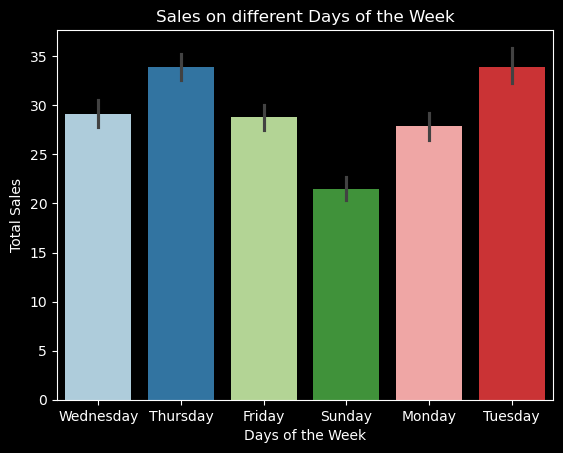

In [270]:
palette = sns.color_palette("Paired")
sns.barplot(data=data, x="Day Name", y="Total Price", palette=palette)
plt.title("Sales on different Days of the Week")
plt.xlabel("Days of the Week")
plt.ylabel("Total Sales")
plt.show()

<font color="white" size=3><b>2) Average revenue of each day of every Month</b></font>

In [272]:
Pivot_data = data.pivot_table(index='Month' ,  columns='Day Name' , values = 'Total Price' , aggfunc = 'mean' )
Pivot_data.style.background_gradient()

Day Name,Friday,Monday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,
1,35.967969,24.766365,26.025000,22.085097,30.129124,30.386741
2,25.395356,66.652033,23.150000,21.314141,43.632481,18.233016
3,27.024802,18.164542,19.602969,37.088345,51.351588,27.440779
4,23.642424,20.037667,18.649273,22.354359,43.629712,30.422222
5,24.977168,21.383593,18.302639,63.671602,22.520855,29.997633
6,31.145503,18.731771,39.460066,15.750863,67.031019,33.083011
7,18.439963,24.568000,17.645641,28.589665,16.347103,19.859714
8,32.127246,24.139852,12.416514,43.258096,36.286565,28.789344
9,23.590600,55.345401,17.497778,26.593925,54.367273,18.050346


Text(170.72222222222223, 0.5, 'Months represented')

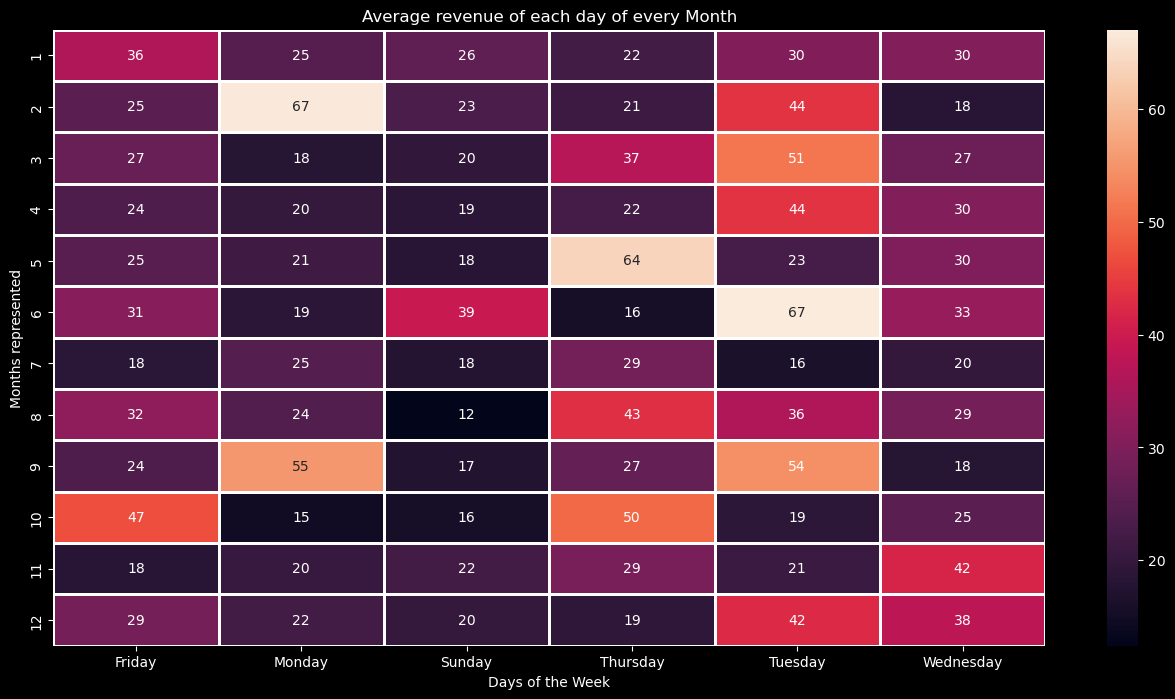

In [273]:
plt.figure(figsize = (16, 8))
sns.heatmap(Pivot_data , linewidths = 1 , annot=True)
plt.title("Average revenue of each day of every Month")
plt.xlabel("Days of the Week")
plt.ylabel("Months represented")

<font color="white" size=3><b>3) Top 10 Most Popular Items</b></font>

Text(0.5, 1.0, 'Top 10 Most Popular Items')

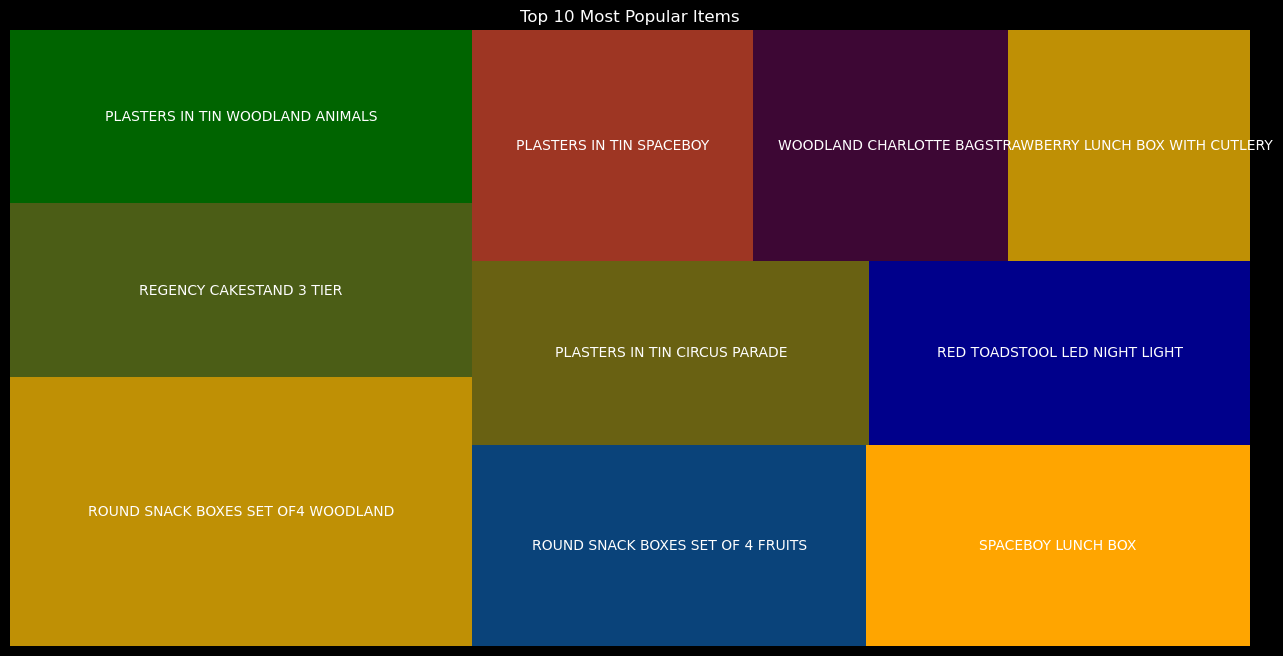

In [275]:
plt.figure(figsize = (16, 8))
x = data["Description"].value_counts().sort_values(ascending = False).head(10)
color = ["#bf9005" ,"#4b5d16", "darkgreen", "#0a437a", "orange", "#696112", "darkblue", "#9e3623", "#3d0734"]
sq.plot(sizes=x , label = x.index , color=color ).axis('off')
plt.title("Top 10 Most Popular Items")

* Extract Data For Recommendation 

In [277]:
data = data.drop(["Quantity","InvoiceDate", "UnitPrice", \
                             "Country", "Total Price", \
                             "Year", "Month", "Hour", \
                             "Day of Week", "Day Name"], axis = 1)

In [278]:
data.head()

,InvoiceNo,Description
0,536370,ALARM CLOCK BAKELIKE PINK
1,536370,ALARM CLOCK BAKELIKE RED
2,536370,ALARM CLOCK BAKELIKE GREEN
3,536370,PANDA AND BUNNIES STICKER SHEET
4,536370,STARS GIFT TAPE


* Group Products For Each InvoiceNo

In [280]:
items_per_transaction = data[['InvoiceNo' , 'Description']].groupby('InvoiceNo').agg(",".join).reset_index()
items_per_transaction

,InvoiceNo,Description
0,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE..."
1,536403,HAND WARMER BIRD DESIGN
2,536527,"SET OF 6 T-LIGHTS SANTA,ROTATING SILVER ANGELS..."
3,536840,"JAM MAKING SET PRINTED,JAM JAR WITH PINK LID,J..."
4,536852,"PICTURE DOMINOES,MINI JIGSAW SPACEBOY,MINI JIG..."
...,...,...
1103,581494,"RABBIT NIGHT LIGHT,STRAWBERRY LUNCH BOX WITH C..."
1104,581570,"CHRISTMAS CRAFT TREE TOP ANGEL,PINK OWL SOFT T..."
1105,581574,"ROUND SNACK BOXES SET OF4 WOODLAND,ROUND SNACK..."
1106,581578,"SET/10 BLUE POLKADOT PARTY CANDLES,SET/10 PINK..."


* Save New Data

In [282]:
items_per_transaction.to_csv("Items_per_Transaction.csv", index = False)